# Deep Learning with PyTorch Step-by-Step: A Beginner's Guide

# Putting It All Together (Simple Classification Problem)

In [1]:
!pwd

/Users/chang/Documents/dev/git/gratia/02_ml/tools_code/pytorch/DeepLearningWithPytorch[EducativeIO]


In [2]:
import numpy as np
import torch
import torch.optim as optim
import torch.nn as nn
import torch.functional as F

from torch.utils.data import DataLoader, TensorDataset
from sklearn.datasets import make_moons
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, roc_curve, precision_recall_curve, auc

from StepByStep import *

print('DONE')

/Users/chang/Documents/dev/git/gratia/02_ml/tools_code/pytorch/.venv/lib/python3.9/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


DONE


/Users/chang/Documents/dev/git/gratia/02_ml/tools_code/pytorch/.venv/lib/python3.9/site-packages/setuptools/distutils_patch.py:25: UserWarning: Distutils was imported before Setuptools. This usage is discouraged and may exhibit undesirable behaviors or errors. Please use Setuptools' objects directly or at least import Setuptools first.
  warnings.warn(


## Data Generation

In [3]:
X, y = make_moons(n_samples=100, noise=0.3, random_state=0)
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=.2, random_state=13)

In [4]:
sc = StandardScaler()
sc.fit(X_train)

X_train = sc.transform(X_train)
X_val = sc.transform(X_val)

In [5]:
type(X_train)

numpy.ndarray

In [35]:
# First column of every row
X_train[:,0]

array([-0.59635346,  0.3937561 ,  1.33167696, -1.52208256, -1.20280449,
       -0.65443973,  1.00612744, -0.28996374,  0.03349394, -0.94744907,
        0.61340448,  1.90666775, -1.51519782,  0.83679088, -0.5673415 ,
        1.34884731, -0.19406929, -1.57387163, -0.72861616,  1.36732327,
       -1.16333041, -0.49927845,  1.24056139, -0.31599591, -0.00410317,
       -0.39572336, -1.59788135, -0.95127788,  0.2648369 , -0.84669415,
       -2.01025248, -0.68877598, -0.81948226, -0.25959788, -0.9448469 ,
        0.05654946, -0.19697736,  0.10293951, -1.10929041,  0.17772649,
        0.53099826,  0.50765113,  0.69070656, -0.39213398,  0.18001833,
        0.33221211, -0.96156663,  1.82998888, -0.50673058, -0.45771551,
        0.2314398 ,  0.77520027,  1.16651035,  0.90647024,  1.61393402,
       -1.27110231, -0.80001929,  1.83249665, -0.31387723,  1.70753925,
       -1.98598605, -0.01583184,  0.76739167,  1.5526051 ,  0.45300973,
        0.27289479, -0.13692804,  1.72939165,  0.53182616,  1.41

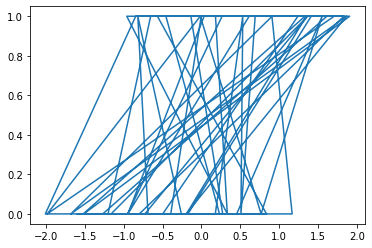

In [39]:
from matplotlib import pyplot as plt 

plt.plot(X_train[:,0], y_train)


In [40]:
y_train

array([1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0,
       1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1,
       1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1])

In [41]:
y_train.reshape(-1, 1)

array([[1],
       [1],
       [1],
       [0],
       [0],
       [1],
       [1],
       [1],
       [1],
       [0],
       [1],
       [1],
       [0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [1],
       [1],
       [1],
       [0],
       [0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [1],
       [1],
       [1],
       [0],
       [1],
       [1],
       [1],
       [1],
       [0],
       [0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [1],
       [1],
       [1],
       [0],
       [1],
       [0],
       [1],
       [0],
       [0],
       [1],
       [1],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [1]])

## Full Pipeline

### Data Preparation

In [42]:
torch.manual_seed(13)

# Builds tensors from numpy arrays
x_train_tensor = torch.as_tensor(X_train).float()
y_train_tensor = torch.as_tensor(y_train.reshape(-1, 1)).float() # reshape converts a 1D array [1,2] to 2D array [ [1], [2]]

x_val_tensor = torch.as_tensor(X_val).float()
y_val_tensor = torch.as_tensor(y_val.reshape(-1, 1)).float()

# Builds dataset containing ALL data points
train_dataset = TensorDataset(x_train_tensor, y_train_tensor)
val_dataset = TensorDataset(x_val_tensor, y_val_tensor)

# Builds a loader of each set
train_loader = DataLoader(
    dataset=train_dataset, 
    batch_size=16, 
    shuffle=True
)
val_loader = DataLoader(dataset=val_dataset, batch_size=16)

### Model Configuration

In [43]:
# Sets learning rate - this is "eta" ~ the "n" like Greek letter
lr = 0.1

torch.manual_seed(42)
model = nn.Sequential()
model.add_module('linear', nn.Linear(2, 1))

# Defines a SGD optimizer to update the parameters
optimizer = optim.SGD(model.parameters(), lr=lr)

# Defines a BCE loss function
loss_fn = nn.BCEWithLogitsLoss()

### Model Training

In [44]:
n_epochs = 100

sbs = StepByStep(model, loss_fn, optimizer)
sbs.set_loaders(train_loader, val_loader)
sbs.train(n_epochs)

## Model Parameters

In [45]:
# printing the parameter values of the Linear model
print(model.state_dict())

OrderedDict([('linear.weight', tensor([[ 1.1806, -1.8693]])), ('linear.bias', tensor([-0.0591]))])


## Model Evaluation

In [46]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

In [48]:
logits_val = sbs.predict(X_val)
probabilities_val = sigmoid(logits_val).squeeze()
cm_thresh50 = confusion_matrix(y_val, (probabilities_val >= 0.5))
print(cm_thresh50)

[[ 7  2]
 [ 1 10]]
